In [14]:
#add dependencies
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#create variable to hold path for csv file
hac = "HappinessAlcoholConsumption.csv"
whr = "world-happiness-report.csv"

#read csv file and store in pd frame
hac_read = pd.read_csv(hac)
# hac_read.head()
whr_read = pd.read_csv(whr)
# whr_read.head()

# rename country column
renamed_hac = hac_read.rename(columns={"Country":"Country name"})
renamed_hac.head()

# Merge data frames
merge_df = pd.merge(renamed_hac, whr_read, on="Country name", how="inner")
merge_df.head()


,Country name,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278,2005,8.019,10.851,0.972,69.60,0.971,NaN,0.237,0.860,0.154
1,Denmark,Western Europe,north,7.526,928,53.579,224,81,278,2007,7.834,10.891,0.954,69.92,0.932,0.240,0.206,0.828,0.194
2,Denmark,Western Europe,north,7.526,928,53.579,224,81,278,2008,7.971,10.880,0.954,70.08,0.970,0.272,0.248,0.757,0.163
3,Denmark,Western Europe,north,7.526,928,53.579,224,81,278,2009,7.683,10.824,0.939,70.24,0.949,0.264,0.206,0.749,0.234
4,Denmark,Western Europe,north,7.526,928,53.579,224,81,278,2010,7.771,10.839,0.975,70.40,0.944,0.242,0.175,0.785,0.155


In [15]:
df['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa'], dtype=object)

In [16]:
pd.DataFrame(dict(df['Region'].value_counts()).items(), columns = ['Region','Numbers'])

,Region,Numbers
0,Sub-Saharan Africa,28
1,Central and Eastern Europe,27
2,Latin America and Caribbean,23
3,Western Europe,20
4,Middle East and Northern Africa,11
5,Southeastern Asia,5
6,Eastern Asia,4
7,Australia and New Zealand,2
8,North America,2


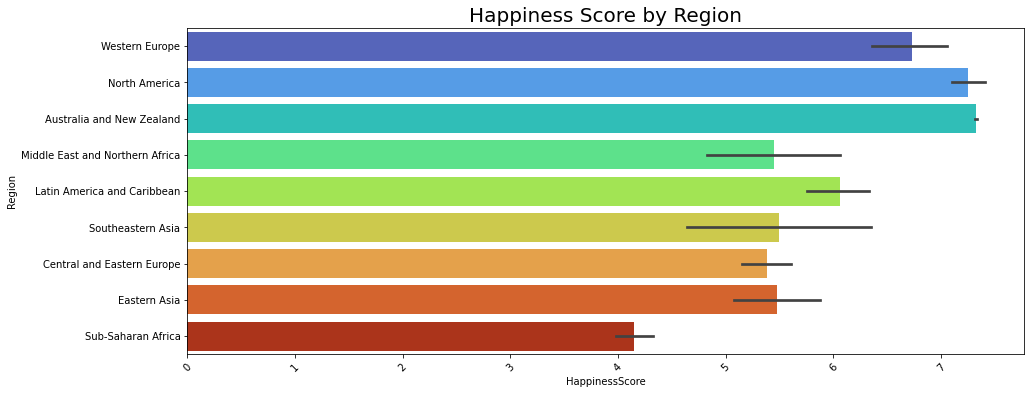

In [17]:
import seaborn as sns
plt.figure(figsize = (15,6))
sns.barplot(x ='HappinessScore',y= 'Region',data = df, palette = 'turbo')
plt.title('Happiness Score by Region', fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

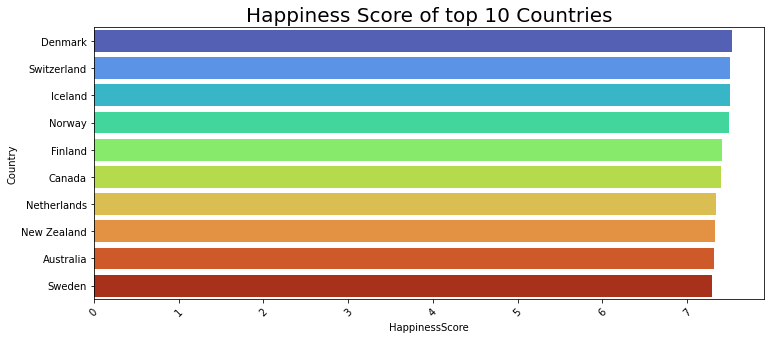

In [21]:
import seaborn as sns
plt.figure(figsize = (12,5))
sns.barplot(x ='HappinessScore',y= 'Country',data = df.nlargest(10,'HappinessScore'), palette = 'turbo')
plt.title('Happiness Score of top 10 Countries', fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

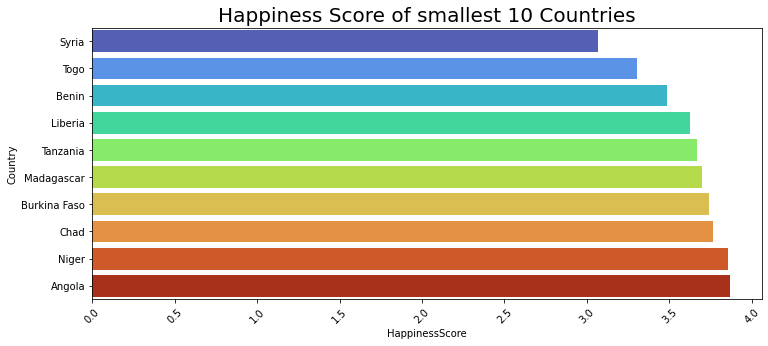

In [20]:
import seaborn as sns
plt.figure(figsize = (12,5))
sns.barplot(x ='HappinessScore',y= 'Country',data = df.nsmallest(10,'HappinessScore'), palette = 'turbo')
plt.title('Happiness Score of smallest 10 Countries', fontsize = 20)
plt.xticks(rotation = 45)
plt.show()